In [1]:
from Model_Utility import Model_Util

### Machine Running library install
from sklearn.neighbors import KNeighborsRegressor

### 선형회귀모델 라이브러리 정의
from sklearn.linear_model import LinearRegression

### visualization library
import matplotlib.pyplot as plt

# Definition of the NumPy library
import numpy as np

### Definition of Library (Preprocessing Library)
from sklearn.model_selection import train_test_split

# - Defining the MAE Library
from sklearn.metrics import mean_absolute_error

# - 변환기 모델(클래스) 라이브러리 정의하기
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler


import pandas as pd 

plt.rc("font", family="Malgun Gothic")

plt.rcParams["axes.unicode_minus"] = False

In [2]:
### 데이터 읽어들이기
# 변수명: df
file_path = "./data/03_농어의_길이_높이_두께_데이터.csv"
df = pd.read_csv(file_path)
df.info()
df.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   length  56 non-null     float64
 1   height  56 non-null     float64
 2   width   56 non-null     float64
dtypes: float64(3)
memory usage: 1.4 KB


,length,height,width
0,8.4,2.11,1.41


In [3]:
### 독립변수 데이터 만들기
# - 데이터프레임의 데이터를 numpy의 배열(array) 형태로 변화하면 됩니다.
# - 변수명: perch_full
# - shape 명령으로 차원 확인하기
perch_full = df.to_numpy()
print(perch_full.shape)

(56, 3)


In [4]:
### 종속변수 생성하기
### 농어의 무게
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [5]:
### 현재 기준 최종 독립변수와 종속변수 데이터
perch_full.shape, perch_weight.shape

((56, 3), (56,))

In [6]:
mu = Model_Util(perch_full, perch_weight, test_size=0.3)

print(mu.train_input.shape, mu.train_target.shape)
print(mu.test_input.shape, mu.test_target.shape)

(39, 3) (39,)
(17, 3) (17,)


In [7]:
mu.train_lr()
mu.evaluate_model()
mu.predict_and_evaluate(mu.test_input)

훈련: 0.9537065271284176 
테스트: 0.886342083634778 
과적합여부: 0.06736444349363968
과적합이 발생하지 않았습니다.
예측결과: [-328.54944233   48.99648009  328.530777    168.01071374  147.28466932
  790.89418753  383.33837613  247.89949679  814.06695812  123.2000108
  981.8543067   -37.63667416  356.2229673   419.56345249   48.15564696
  140.06819759   46.70641917]
평균 절대 오차 (MAE): 68.56651514640546


68.56651514640546

In [8]:
train_poly, test_poly = mu.train_polynomial(degree=2)

mu.evaluate_polynomial(train_poly, test_poly)

mu.predict_and_evaluate(test_scaled = test_poly)

훈련: 0.9898271546307026 
테스트: 0.9713771600629656 
과적합여부: 0.018449994567736994
과적합이 발생하지 않았습니다.
예측결과: [  22.92877835   31.10777487  250.98436388  111.59208216  128.85787135
  779.24558158  304.72417951  176.31471164  916.8961555    98.7200446
 1180.23592257   34.86148711  288.45880297  272.52503942   85.71366627
  120.24574045   59.93605383]
평균 절대 오차 (MAE): 30.216889590342735


30.216889590342735

In [9]:
train_scaled, test_scaled= mu.train_standard_scaler()
mu.predict_and_evaluate(test_scaled)

예측결과: [  22.92877835   31.10777487  250.98436388  111.59208216  128.85787135
  779.24558158  304.72417951  176.31471164  916.8961555    98.7200446
 1180.23592257   34.86148711  288.45880297  272.52503942   85.71366627
  120.24574045   59.93605383]
평균 절대 오차 (MAE): 30.216889590344675


30.216889590344675

In [10]:
train_scaled, test_scaled= mu.train_minmax_scaler()
mu.predict_and_evaluate(test_scaled)

예측결과: [  22.92877835   31.10777487  250.98436388  111.59208216  128.85787135
  779.24558158  304.72417951  176.31471164  916.8961555    98.7200446
 1180.23592257   34.86148711  288.45880297  272.52503942   85.71366627
  120.24574045   59.93605383]
평균 절대 오차 (MAE): 30.216889590344127


30.216889590344127

In [11]:
train_scaled, test_scaled= mu.train_robust_scaler()
mu.predict_and_evaluate(test_scaled)

예측결과: [  22.92877835   31.10777487  250.98436388  111.59208216  128.85787135
  779.24558158  304.72417951  176.31471164  916.8961555    98.7200446
 1180.23592257   34.86148711  288.45880297  272.52503942   85.71366627
  120.24574045   59.93605383]
평균 절대 오차 (MAE): 30.216889590346174


30.216889590346174

In [12]:
### 앞에서 사용한 농어의 길이와 무게 사용
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

perch_length.shape, perch_weight.shape

((56,), (56,))

In [13]:
mu = Model_Util(perch_length, perch_weight, test_size=0.25)

print(mu.train_input.shape, mu.train_target.shape)
print(mu.test_input.shape, mu.test_target.shape)

(42,) (42,)
(14,) (14,)


In [14]:
train_input, test_input = mu.change_to_2dim(mu.train_input, mu.test_input)

print(mu.train_input.shape, mu.train_target.shape)
print(mu.test_input.shape, mu.test_target.shape)

(42, 1) (42,)
(14, 1) (14,)


In [15]:
mu.train_lr()

mu.evaluate_model()

훈련: 0.9398463339976041 
테스트: 0.824750312331356 
과적합여부: 0.1150960216662481
과적합여부 결과 0.115로 과적합이 발생할 수도 있습니다


기울기 a = [39.01714496]
y절편 b = -709.0186449535474


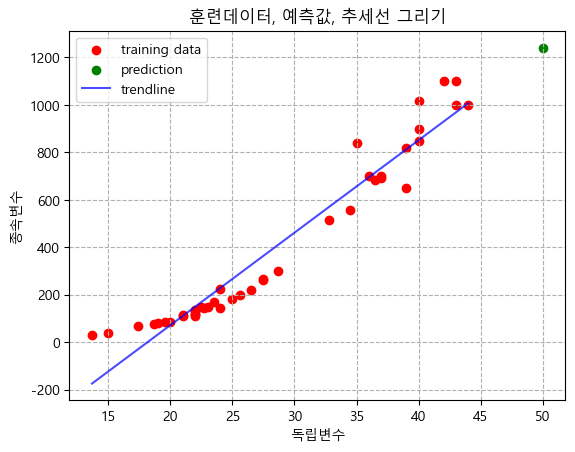

In [16]:
pred = mu.predict_value(50)

mu.coef_intercept()

mu.plot_trendline(pred=pred)

In [17]:
train_poly, test_poly = mu.add_square()
# print(train_poly.shape, test_poly.shape)
mu.train_mlr()
mu.mlr_evaluate_model()

훈련: 0.9706807451768623 
테스트: 0.9775935108325122 
과적합여부: -0.006912765655649911
과적합이 발생하지 않았습니다.


예측값[1573.98423528]
기울기 a = 1.0143321093767301
기울기 b = -21.557924978837352
y절편 b = -21.557924978837352


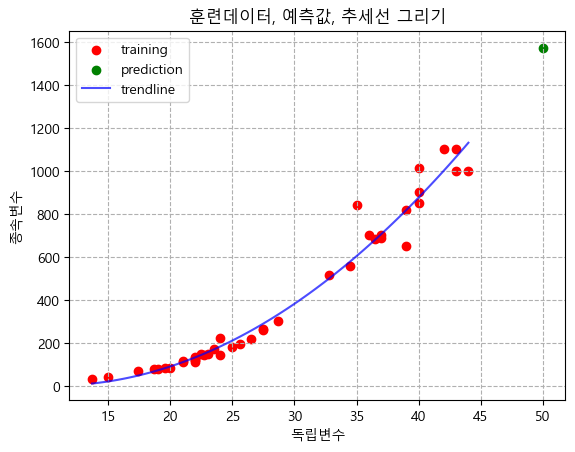

In [18]:
pred = mu.mlr_predict_value(50)
pred

mu.mlr_coef_intercept()

mu.mlr_plot_trendline(pred=pred)